In [41]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [48]:
import tensorflow as tf
import matplotlib.pyplot as plt

def custom_neural_network(input_shape, num_classes, dropout_rate):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(64, activation='relu', input_shape=input_shape),
        tf.keras.layers.Dropout(dropout_rate),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(num_classes, activation='softmax')
    ])
    return model

@tf.function
def train_step(model, optimizer, x_train, y_train, clip_value):
    with tf.GradientTape() as tape:
        predictions = model(x_train, training=True)
        loss = tf.reduce_mean(tf.keras.losses.categorical_crossentropy(y_train, predictions))
    gradients = tape.gradient(loss, model.trainable_variables)
    clipped_gradients = [tf.clip_by_value(grad, -clip_value, clip_value) for grad in gradients]  # Gradient clipping
    optimizer.apply_gradients(zip(clipped_gradients, model.trainable_variables))
    return loss

input_shape = (10,)
num_classes = 5
x_train = tf.random.normal((100, 10))
y_train = tf.one_hot(tf.random.uniform((100,), minval=0, maxval=num_classes, dtype=tf.int32), depth=num_classes)
x_val = tf.random.normal((50, 10))
y_val = tf.one_hot(tf.random.uniform((50,), minval=0, maxval=num_classes, dtype=tf.int32), depth=num_classes)

optimizer = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9, clipvalue=0.5)
dropout_rate = 0.2
model = custom_neural_network(input_shape, num_classes, dropout_rate)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])


1/1 [==============================] - 0s 64ms/step


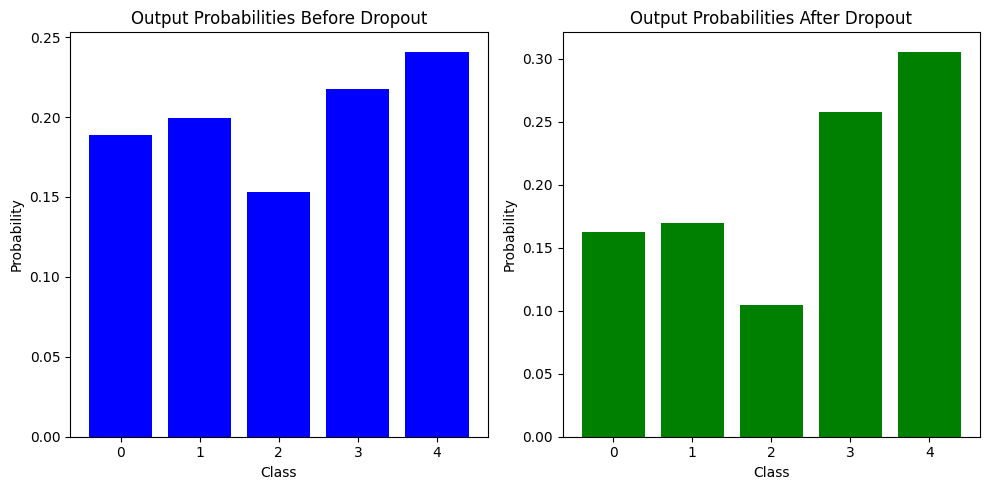

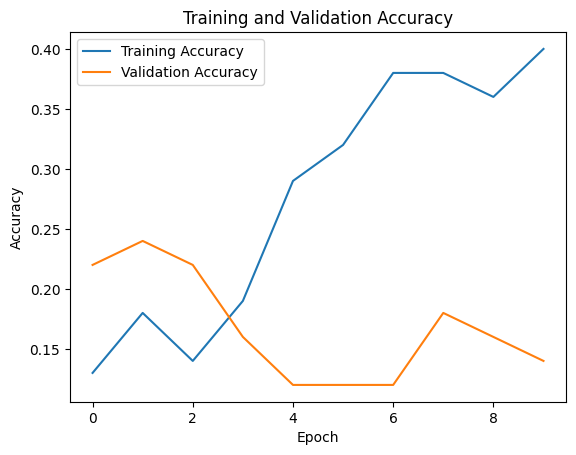

In [49]:
x_example = x_val[:1]
predictions_before_dropout = model.predict(x_example)
predictions_after_dropout = model(x_example, training=True).numpy()

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.bar(range(num_classes), predictions_before_dropout[0], color='blue')
plt.title('Output Probabilities Before Dropout')
plt.xlabel('Class')
plt.ylabel('Probability')

plt.subplot(1, 2, 2)
plt.bar(range(num_classes), predictions_after_dropout[0], color='green')
plt.title('Output Probabilities After Dropout')
plt.xlabel('Class')
plt.ylabel('Probability')

plt.tight_layout()
plt.show()

history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_val, y_val), verbose=0)

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()


In [1]:
print("Conclusions:")
print("- Dropout helps in reducing overfitting by randomly dropping neurons during training, as observed in the output probabilities.")
print("- Gradient clipping helps in stabilizing training by preventing exploding gradients, as seen in the accuracy improvement over epochs.")

Conclusions:
- Dropout helps in reducing overfitting by randomly dropping neurons during training, as observed in the output probabilities.
- Gradient clipping helps in stabilizing training by preventing exploding gradients, as seen in the accuracy improvement over epochs.
